<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/Flores_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset a seguir é muito utilizado no campo de datascience .
Se trata de reconhecer as especies das flores pelos dados .

In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

df = pd.DataFrame(np.c_[X,y], columns = iris.feature_names[2:] + ['flower'])
df['flower_name'] = df.flower.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.sample(20)

,petal length (cm),petal width (cm),flower,flower_name
1,1.4,0.2,0.0,setosa
96,4.2,1.3,1.0,versicolor
116,5.5,1.8,2.0,virginica
88,4.1,1.3,1.0,versicolor
84,4.5,1.5,1.0,versicolor
19,1.5,0.3,0.0,setosa
142,5.1,1.9,2.0,virginica
141,5.1,2.3,2.0,virginica
68,4.5,1.5,1.0,versicolor
149,5.1,1.8,2.0,virginica


In [3]:
df.groupby('flower_name').mean()

,petal length (cm),petal width (cm),flower
flower_name,,,
setosa,1.462,0.246,0.0
versicolor,4.260,1.326,1.0
virginica,5.552,2.026,2.0


### Plotando o comprimento e largura delas

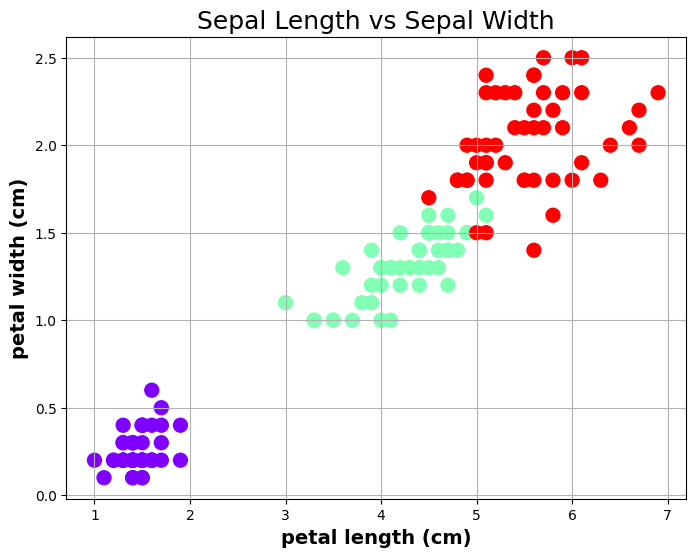

In [4]:
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow, s = 100)
plt.xlabel(df.columns[0], fontsize = 14, fontweight = 'bold')
plt.ylabel(df.columns[1], fontsize = 14, fontweight = 'bold')
plt.title('Sepal Length vs Sepal Width', fontsize = 18)
plt.grid()
plt.show()

ja vimos que esse é uma classificação e que vamos classificar por classes .

In [5]:
# importando a arvore de decisão

from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(max_depth=2 , random_state=0)
arvore.fit(X,y)



DecisionTreeClassifier(max_depth=2, random_state=0)

In [6]:
df.head(5)

,petal length (cm),petal width (cm),flower,flower_name
0,1.4,0.2,0.0,setosa
1,1.4,0.2,0.0,setosa
2,1.3,0.2,0.0,setosa
3,1.5,0.2,0.0,setosa
4,1.4,0.2,0.0,setosa


In [7]:
folha1 = df.loc[df['petal length (cm)'] <= 2.45]
folha2 = df.loc[(df['petal length (cm)'] > 2.45) & (df['petal width (cm)'] <= 1.75)]
folha3 = df.loc[(df['petal length (cm)'] > 2.45) & (df['petal width (cm)'] > 1.75)]


In [8]:
folha1.flower.value_counts()

flower
0.0    50
Name: count, dtype: int64

In [9]:
folha2.flower.value_counts()

flower
1.0    49
2.0     5
Name: count, dtype: int64

In [10]:
folha3.flower.value_counts()

flower
2.0    45
1.0     1
Name: count, dtype: int64

In [11]:
arvore.predict_proba(X)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

# Regularizando os hiperparametros

In [12]:
from sklearn.datasets import make_moons, make_blobs

In [13]:
def geradados(size=500):
  #X, y = make_moons(size, noise=0.2)
  X, y = make_blobs(n_samples=size, centers = [[0,0],[1,0],[0.5, 1]], cluster_std = 0.3)
  return X, y

In [14]:
X, y = geradados()

X.shape, y.shape

((500, 2), (500,))

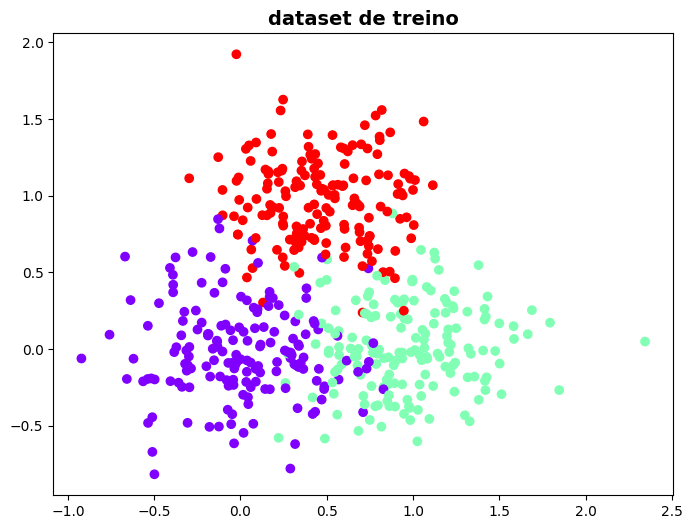

In [15]:
plt.figure(figsize=[8,6], dpi=100)
plt.title('dataset de treino', fontsize = 14, fontweight = 'bold')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
plt.show()

Fitando e vendo como reage aos dados de treino

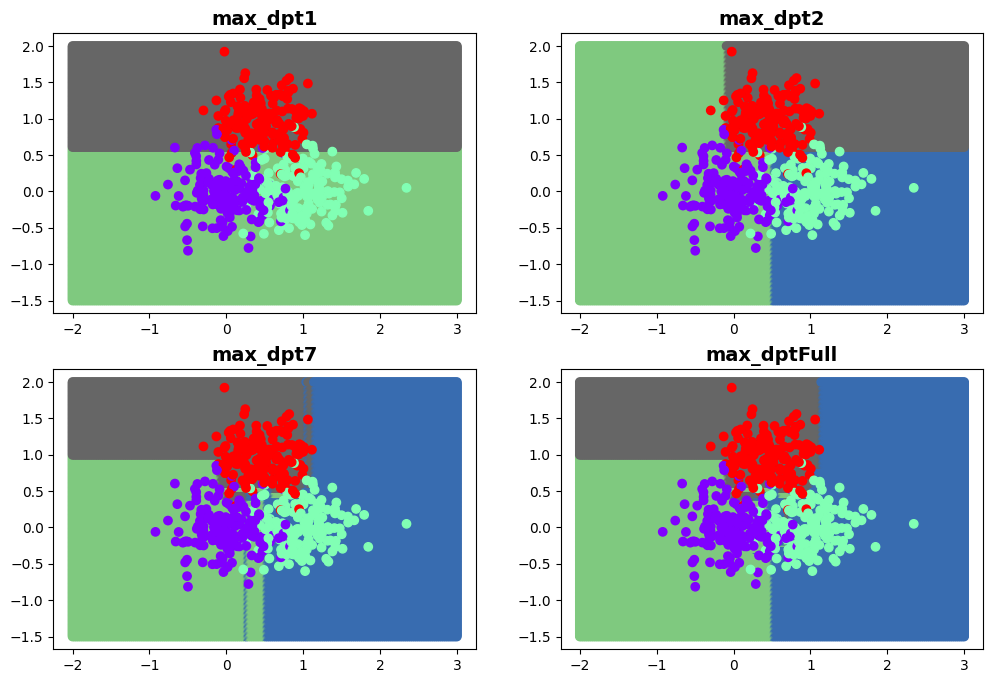

In [16]:
dt1 = DecisionTreeClassifier(max_depth= 1)
dt2 = DecisionTreeClassifier(max_depth= 2)
dt3 = DecisionTreeClassifier(max_depth= 7)
dt4 = DecisionTreeClassifier(max_depth= None)

modelos = [dt1, dt2, dt3, dt4]
nomes = ['max_dpt1', 'max_dpt2', 'max_dpt7', 'max_dptFull']

plt.figure(figsize=[12,8])
for i in range(4):
  plt.subplot(2,2,i+1)
  modelo_i = modelos[i].fit(X,y)

  S = 200

  xx, yy = np.linspace(-2, 3, S), np.linspace(-1.5, 2, S)
  mesh = np.meshgrid(xx, yy)
  xx, yy = mesh
  xx = xx.ravel()
  yy = yy.ravel()
  mesh_X = np.c_[xx, yy]
  plt.scatter(xx, yy, c = modelo_i.predict(mesh_X), cmap = plt.cm.Accent)
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
  plt.title(nomes[i], fontsize = 14, fontweight = 'bold')

plt.show()

Vamos analisar a curacia dos dados de treino:


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
for i in range(4):
  modelo_i = modelos[i]
  print(nomes[i])
  print('acuracia:' + str(accuracy_score(y_true = y, y_pred = modelo_i.predict(X))))
  print()

max_dpt1
acuracia:0.636

max_dpt2
acuracia:0.926

max_dpt7
acuracia:0.972

max_dptFull
acuracia:1.0



Vamos simular outros dados e ver o resultado

In [19]:
Xsim, ysim = geradados()

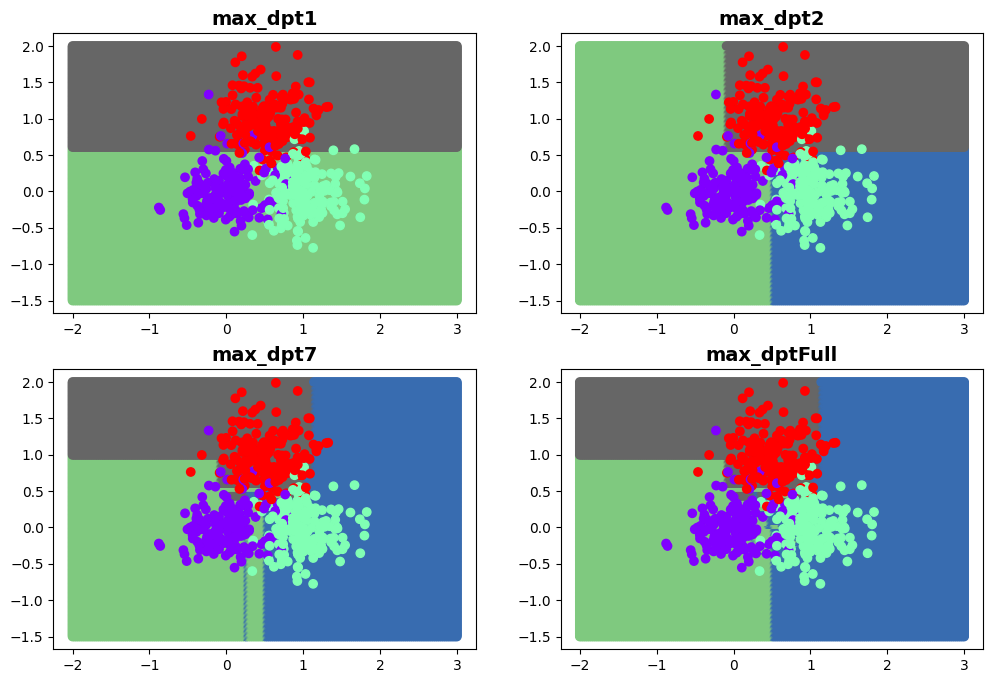

In [20]:
dt1 = DecisionTreeClassifier(max_depth= 1)
dt2 = DecisionTreeClassifier(max_depth= 2)
dt3 = DecisionTreeClassifier(max_depth= 7)
dt4 = DecisionTreeClassifier(max_depth= None)

modelos = [dt1, dt2, dt3, dt4]
nomes = ['max_dpt1', 'max_dpt2', 'max_dpt7', 'max_dptFull']

plt.figure(figsize=[12,8])
for i in range(4):
  plt.subplot(2,2,i+1)
  modelo_i = modelos[i].fit(X,y)

  S = 200

  xx, yy = np.linspace(-2, 3, S), np.linspace(-1.5, 2, S)
  mesh = np.meshgrid(xx, yy)
  xx, yy = mesh
  xx = xx.ravel()
  yy = yy.ravel()
  mesh_X = np.c_[xx, yy]
  plt.scatter(xx, yy, c = modelo_i.predict(mesh_X), cmap = plt.cm.Accent)
  plt.scatter(Xsim[:, 0], Xsim[:, 1], c = ysim, cmap = plt.cm.rainbow)
  plt.title(nomes[i], fontsize = 14, fontweight = 'bold')

plt.show()

In [21]:
for i in range(4):
  modelo_i = modelos[i]
  print(nomes[i])
  print('acuracia:' + str(accuracy_score(y_true = ysim, y_pred = modelo_i.predict(Xsim))))
  print()

max_dpt1
acuracia:0.634

max_dpt2
acuracia:0.918

max_dpt7
acuracia:0.876

max_dptFull
acuracia:0.882



# Arvores de Regressão

         x1    target
0  0.374540 -0.005042
1  0.950714  0.835799
2  0.731994  0.244592
3  0.598658 -0.032501
4  0.156019  0.659870



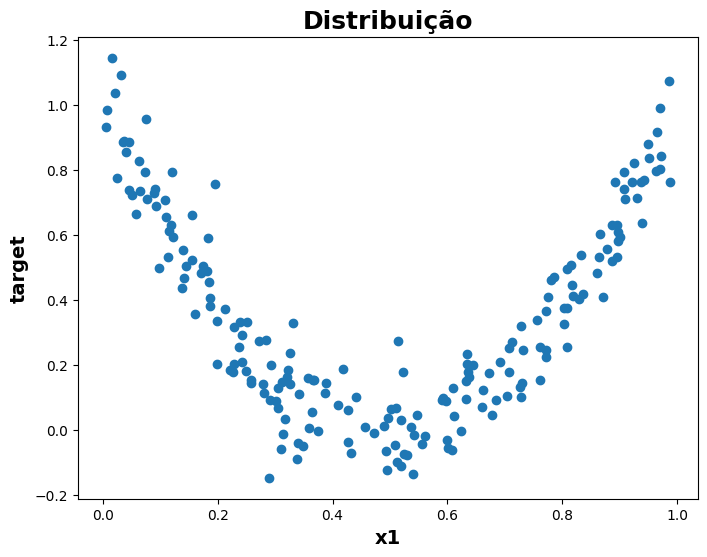

In [22]:
np.random.seed(42)
n = 200
X = np.random.rand(n, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(n, 1) / 10

df = pd.DataFrame(np.c_[X,y], columns = ['x1', 'target'])
print(df.head())
print()

plt.figure(figsize=[8,6], dpi=100)
plt.scatter(df.x1, df.target)
plt.xlabel('x1', fontsize = 14, fontweight = 'bold')
plt.ylabel('target', fontsize = 14, fontweight = 'bold')
plt.title('Distribuição', fontsize = 18, fontweight= 'bold')

plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor
arvore_reg = DecisionTreeRegressor(max_depth=2)
arvore_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

Seguimos e para chear ao resultado , temos que ver a media da variavel target em cada nó

In [24]:
df.loc[(df.x1 <= 0.197) & (df.x1 <= 0.092)].target.mean()

0.8538971465317923

In [25]:
df.loc[(df.x1 <= 0.197) & (df.x1 > 0.092)].target.mean()

0.5522399582417931

In [26]:
df.loc[(df.x1 > 0.197) & (df.x1 <= 0.772)].target.mean()

0.11063973365732514

In [27]:
df.loc[(df.x1 > 0.197) & (df.x1 > 0.772)].target.mean()

0.6146037890125189

In [28]:
def arvore_doc(X, y, tree):
  X_sort = np.sort(X, axis = 0)
  tree.fit(X,y)
  plt.figure(figsize=[8,6])
  plt.scatter(X,y, c='purple', label = 'Dados treino')
  plt.xlabel('x1', fontsize = 14, fontweight = 'bold')
  plt.ylabel('target', fontsize = 14, fontweight = 'bold')
  plt.title('Distribuição', fontsize = 14, fontweight = 'bold')
  plt.plot(X_sort, tree.predict(X_sort), c = 'gray',lw = 3, label = 'Arvore')
  plt.legend()
  plt.show()

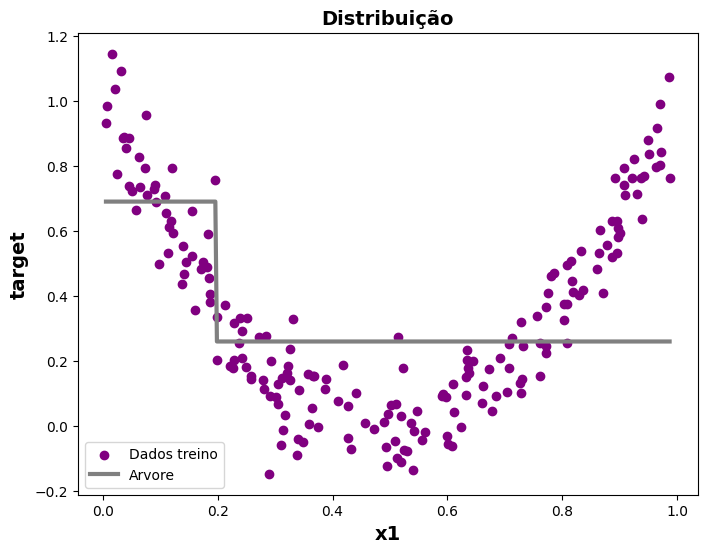

In [29]:
arvore_doc(X, y, tree = DecisionTreeRegressor(max_depth=1))

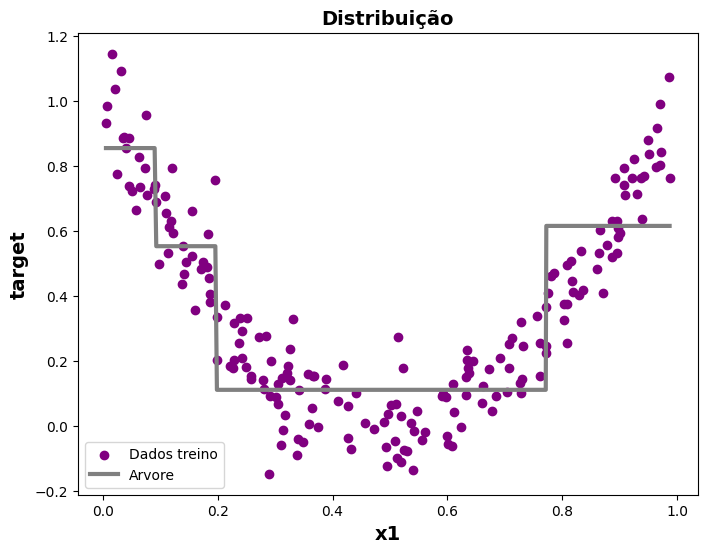

In [30]:
arvore_doc(X, y, tree = DecisionTreeRegressor(max_depth=2))

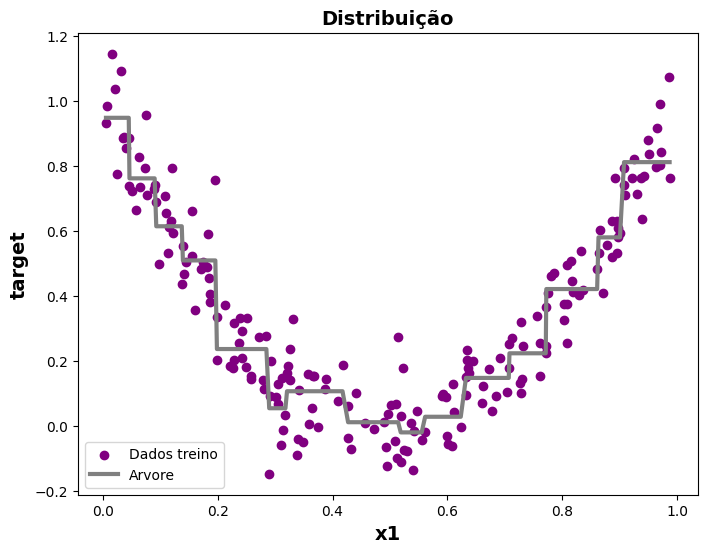

In [31]:
arvore_doc(X, y, tree = DecisionTreeRegressor(min_samples_leaf=10))

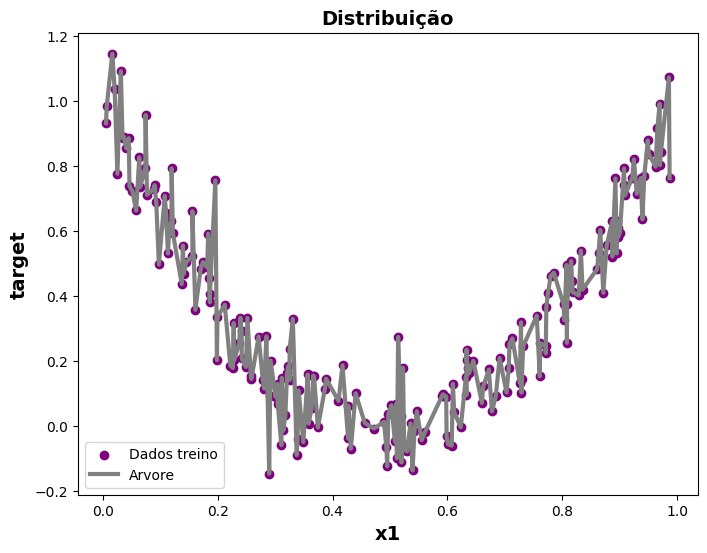

In [32]:
arvore_doc(X, y, tree = DecisionTreeRegressor(max_depth=None))

# Modelos Essambles

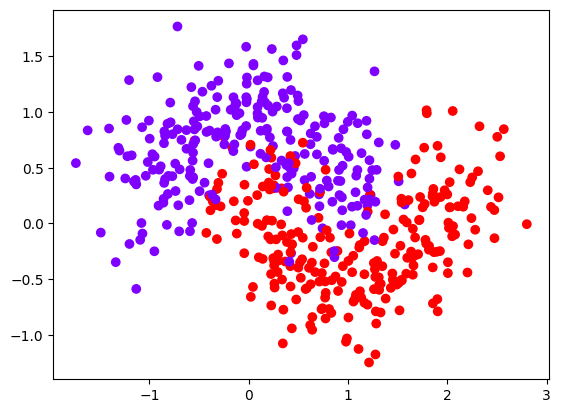

In [33]:
#Importamos os dados - classificação binaria

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


In [36]:
rl = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

#treinando os modelos

rl.fit(Xtrain, ytrain)
dt.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [37]:
#Vamos medir a acuracia

estimadores = [('rl', rl),('knn', knn), ('dt', dt)]

for est in estimadores:
   nome_modelo = est[0]
   modelo = est[1]
   acuracia = accuracy_score(y_true = ytest, y_pred = modelo.predict(Xtest))
   print(nome_modelo,' | Acuracia:' ,acuracia)

rl  | Acuracia: 0.864
knn  | Acuracia: 0.912
dt  | Acuracia: 0.872


# Usando o Votting :

In [38]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = estimadores)
voting.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('rl', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [39]:
accuracy_score(y_true = ytest, y_pred = voting.predict(Xtest))

0.928

# Usando o bagging:

In [40]:
#Carregando dataset para regressão

from sklearn.datasets import load_diabetes
X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
bg = RandomForestRegressor(n_estimators=1000,
                           max_depth=5,
                           min_samples_leaf= 10,
                           max_features= 'auto')
bg.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      n_estimators=1000)

In [43]:
#R2

from sklearn.metrics import r2_score
r2_score(y_true = ytest, y_pred = bg.predict(Xtest))

0.5052647861202224

In [44]:
bg.estimators_

[DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1089556652),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=48763532),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1740329713),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=2012882139),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=306974333),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=241820729),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1034974867),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=510319067),
 DecisionTree

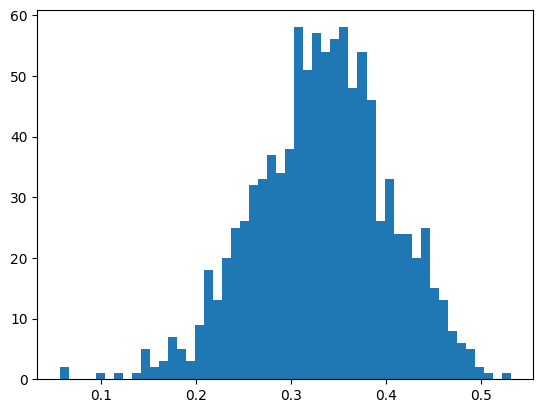

In [45]:
L = []
for i in bg.estimators_:
  r2_est = r2_score(y_true = ytest, y_pred = i.predict(Xtest))
  L.append(r2_est)

plt.hist(L, bins = 50)
plt.show()

# Tipo boosting:

In [47]:
class BoostingRegressor():

  def __init__(self, num_steps, gamma , max_depth ):
    self.num_steps = num_steps
    self.gamma = gamma
    self.max_depth = max_depth

  def fit(self, X, y):
    dic__ = {}
    for b in range(self.num_steps):
      if b == 0:
        resid = y
      dt_b = DecisionTreeRegressor(max_depth=self.max_depth).fit(X, resid)

      resid = resid - self.gamma + dt_b.predict(X)
    self.dic__ = dic__

  def predict(self , X):
    dic = self.dic__
    pred = None
    for b in range (self.num_steps):
      if b == 0:
        pred = (self.gamma * dic[b]).predict(X)
      pred += pred + (self.gamma * dic[b]).predict(X)
    return pred


In [48]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier